In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
dfd=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
dfd

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [26]:
dfd.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [27]:
dfd.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [28]:
dfd.shape

(31647, 18)

The rows and the columns in the dataset 

In [29]:
dfd.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [30]:
dfd.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

here we can see the datatypes of the columns we are predicting the subcripiton of the clients so here subscribed column will be our target variable and it seems categorical dataset

In [31]:
#checking for the null values
dfd.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [32]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


Here we observed that there is no null values in the dataset and datatypes present are int64 and object

In [33]:
# here we are dropping the ID column 
dfd=dfd.drop('ID',axis=1)

In [34]:
dfd

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [37]:
#lets check the number of unique value in each column
dfd.nunique().to_frame()

,0
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3
day,31


In [41]:
# checking the value count of each column

for i in dfd.columns:
    print(dfd[i].value_counts())
    print("\n")

age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: count, Length: 76, dtype: int64


job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64


marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64


education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64


default
no     31062
yes      585
Name: count, dtype: int64


balance
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: count, Length: 6326, dtype: int64


housing
yes    17584
no     14063
Name: count, dtype: int6

In [43]:
dfd.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


here we can see that median is greater then mean at age,balance day duration and campaign

Data Visualization

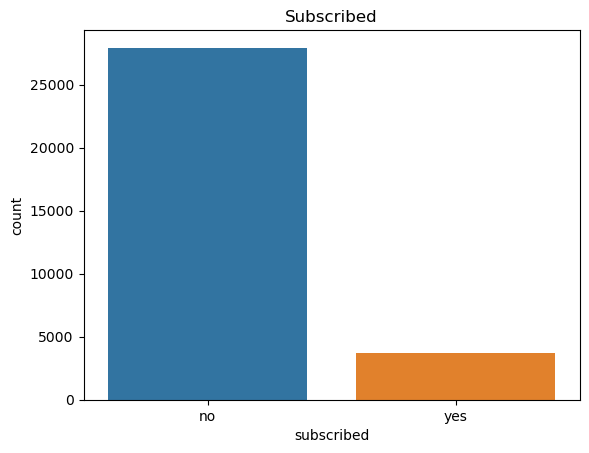

In [45]:
sns.countplot(x='subscribed',data=dfd)
plt.title('Subscribed')
plt.show()

Text(0, 0.5, 'Bank Balance')

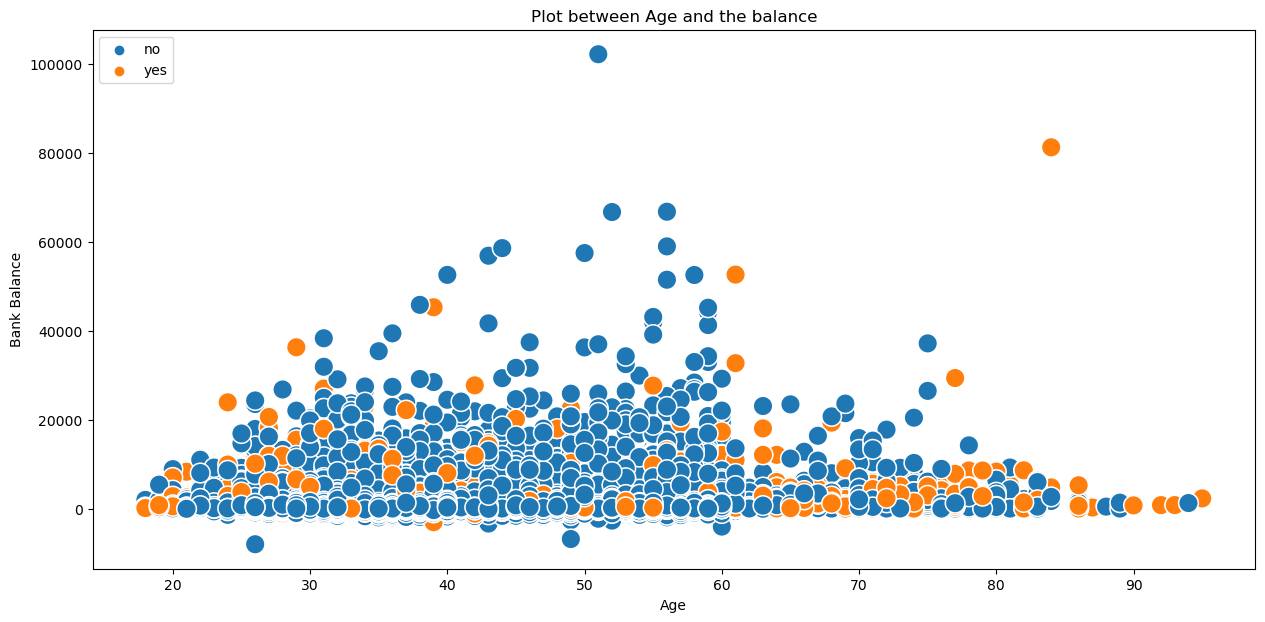

In [47]:
plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between Age and the balance')
sns.scatterplot(x=dfd['age'], y=dfd['balance'], hue=dfd['subscribed'], s=200);
            
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Age')
plt.ylabel("Bank Balance")

Here we observe that age group of 20 to 40 and above 60 have subscribed more maximum from bank balance below 10000

Text(0, 0.5, 'Count')

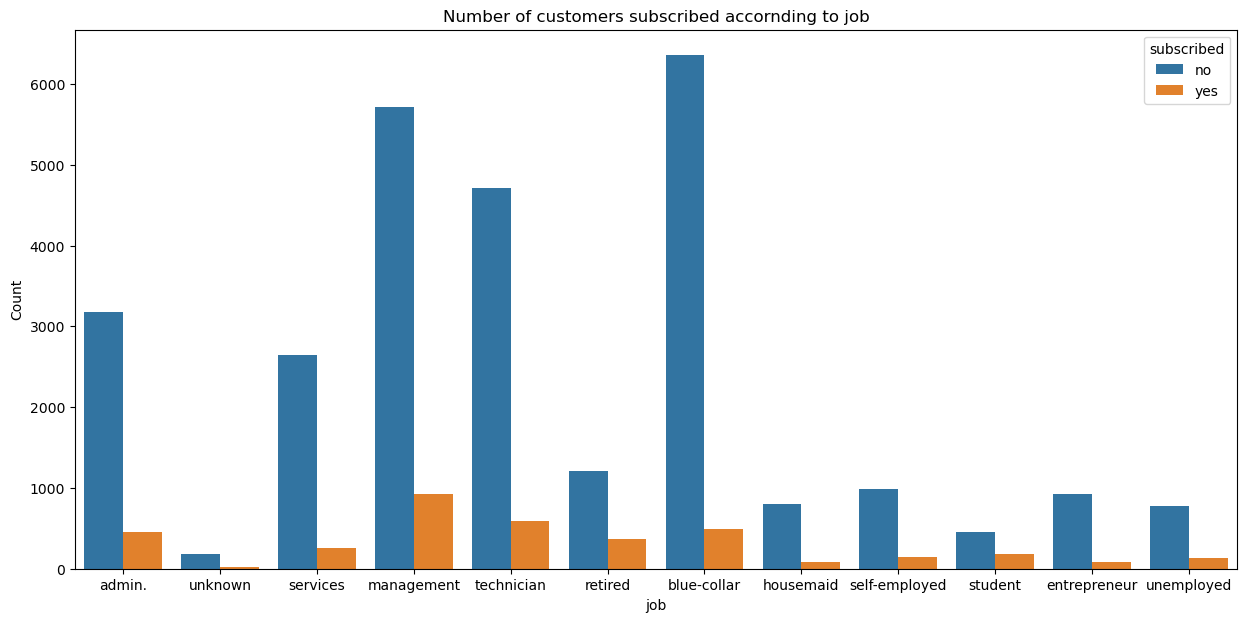

In [51]:
#now lets make countplot according to the job of the customers
sns.countplot(x='job' , hue='subscribed' , data=dfd)

plt.title("Number of customers subscribed accornding to job")
plt.xlabel('job')
plt.ylabel('Count')

here we can observe that the customers belonging to the management is highest in the subscribed custmoers 

Text(0.5, 1.0, 'Subscribed as per education')

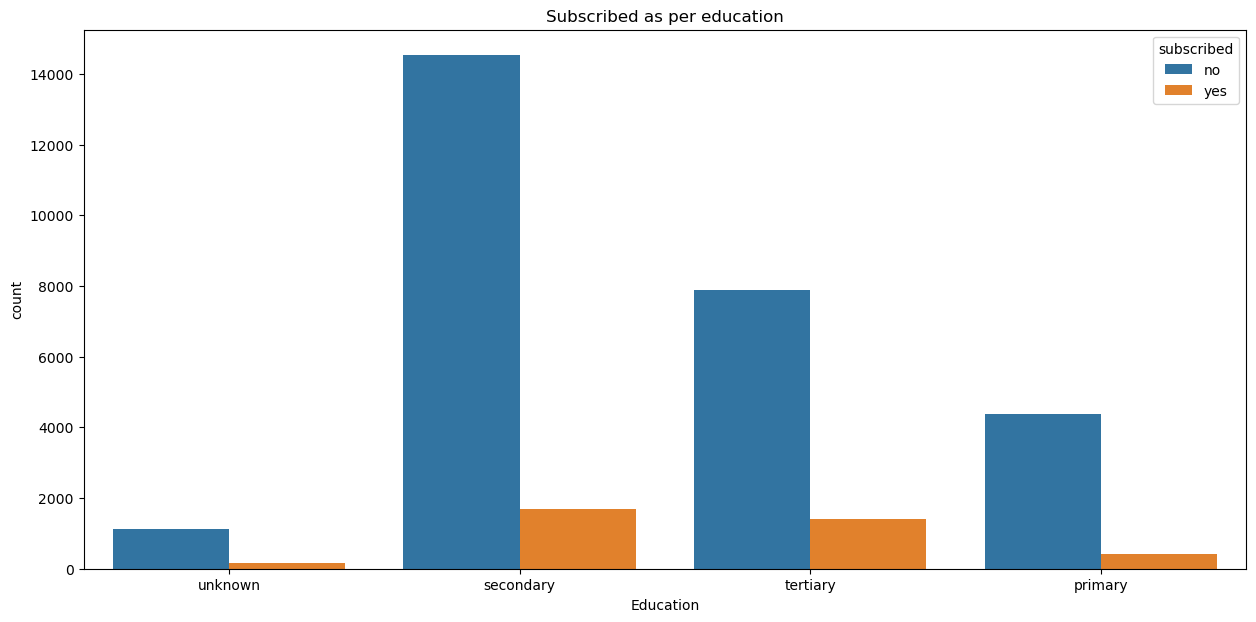

In [55]:
sns.countplot(x='education',hue='subscribed',data=dfd)
plt.xlabel('Education')
plt.ylabel('count')
plt.title('Subscribed as per education')

Text(0.5, 1.0, 'Subscribed as per Marital status')

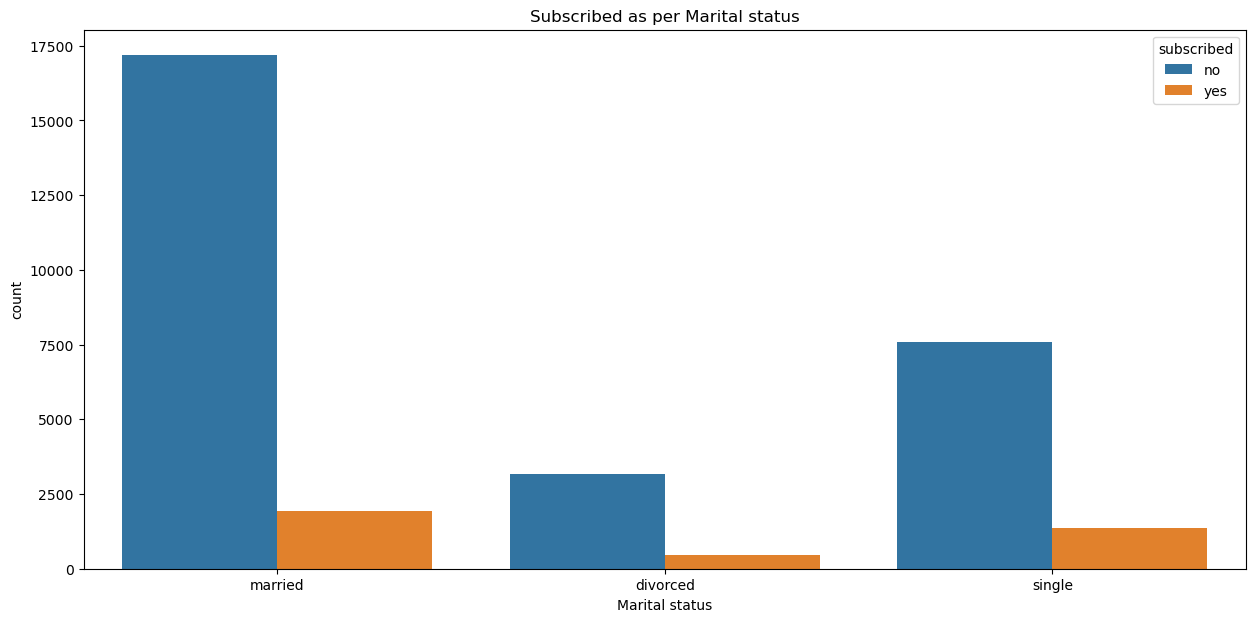

In [57]:
sns.countplot(x='marital',hue='subscribed',data=dfd)
plt.xlabel('Marital status')
plt.ylabel('count')
plt.title('Subscribed as per Marital status')

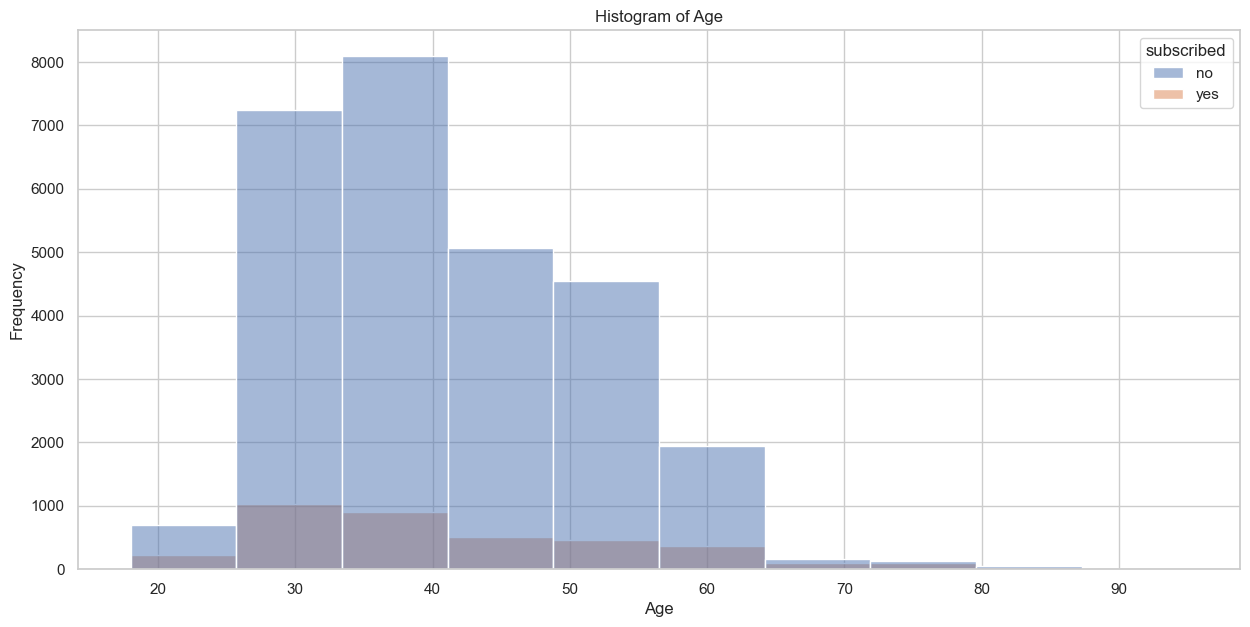

In [62]:
sns.set(style="whitegrid") 
sns.histplot(data=dfd,x='age',bins=10,hue='subscribed')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

here we can observe that the age group between 30 to 40 subscribed more to deposit term

Text(0.5, 1.0, 'Subscribed as per Personal loan')

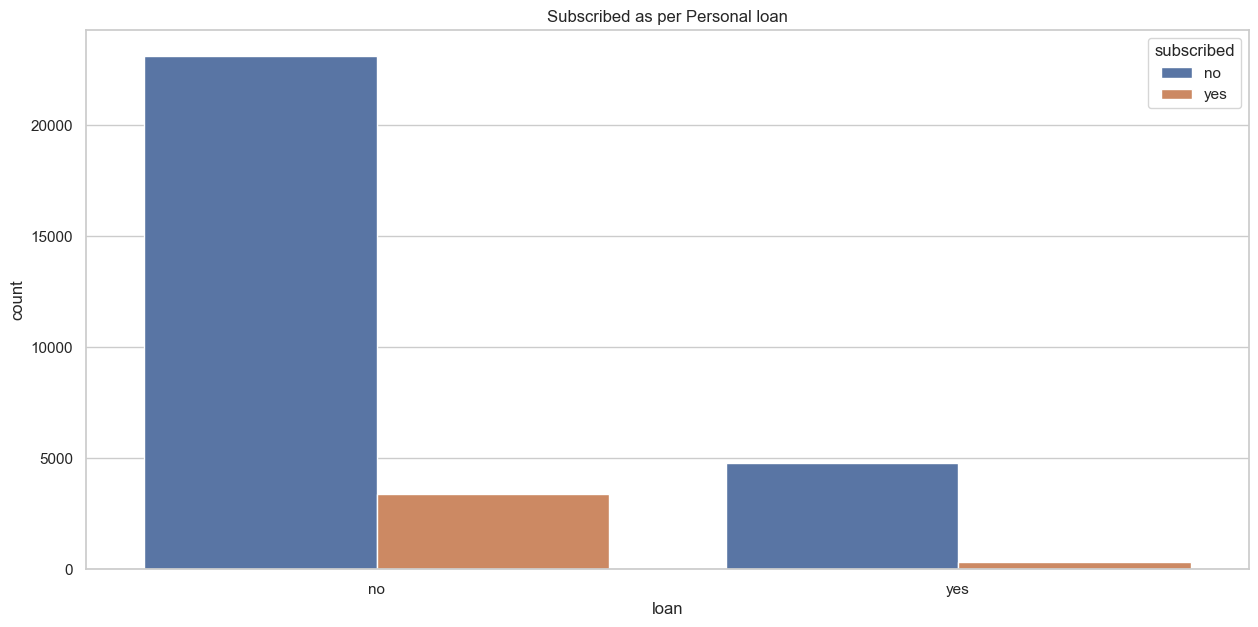

In [72]:
sns.countplot(x='loan',hue='subscribed',data=dfd)
plt.xlabel('loan')
plt.ylabel('count')
plt.title('Subscribed as per Personal loan')

Text(0.5, 1.0, 'Subscribed as per Housing loan')

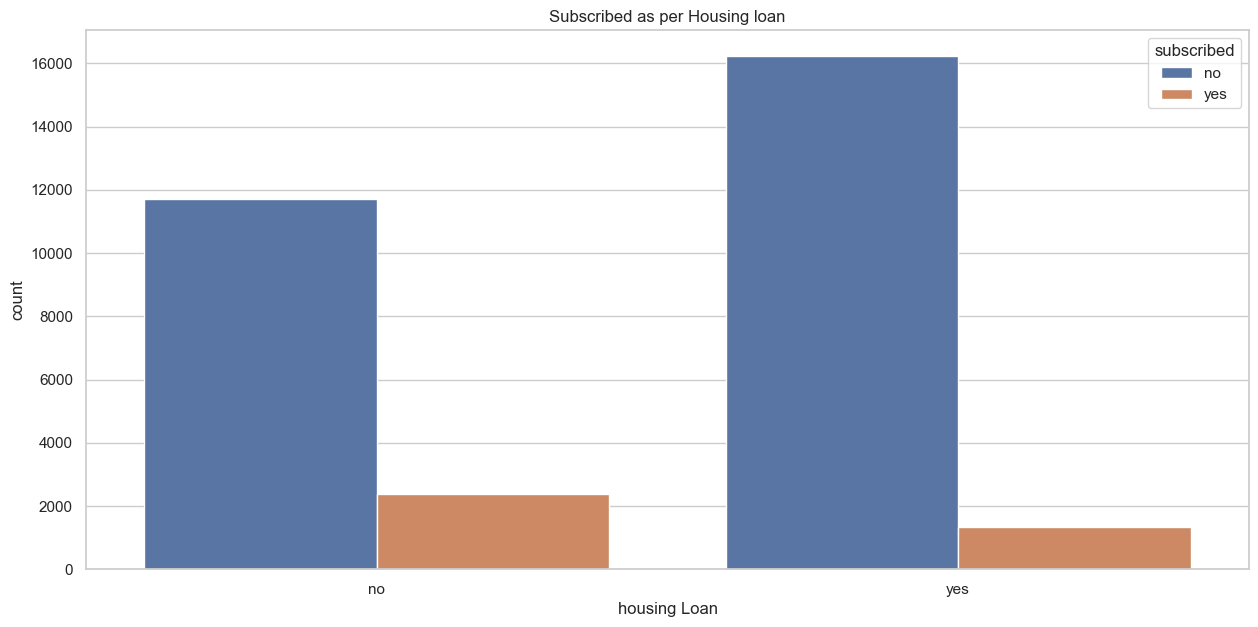

In [71]:
sns.countplot(x='housing',hue='subscribed',data=dfd)
plt.xlabel('housing Loan')
plt.ylabel('count')
plt.title('Subscribed as per Housing loan')

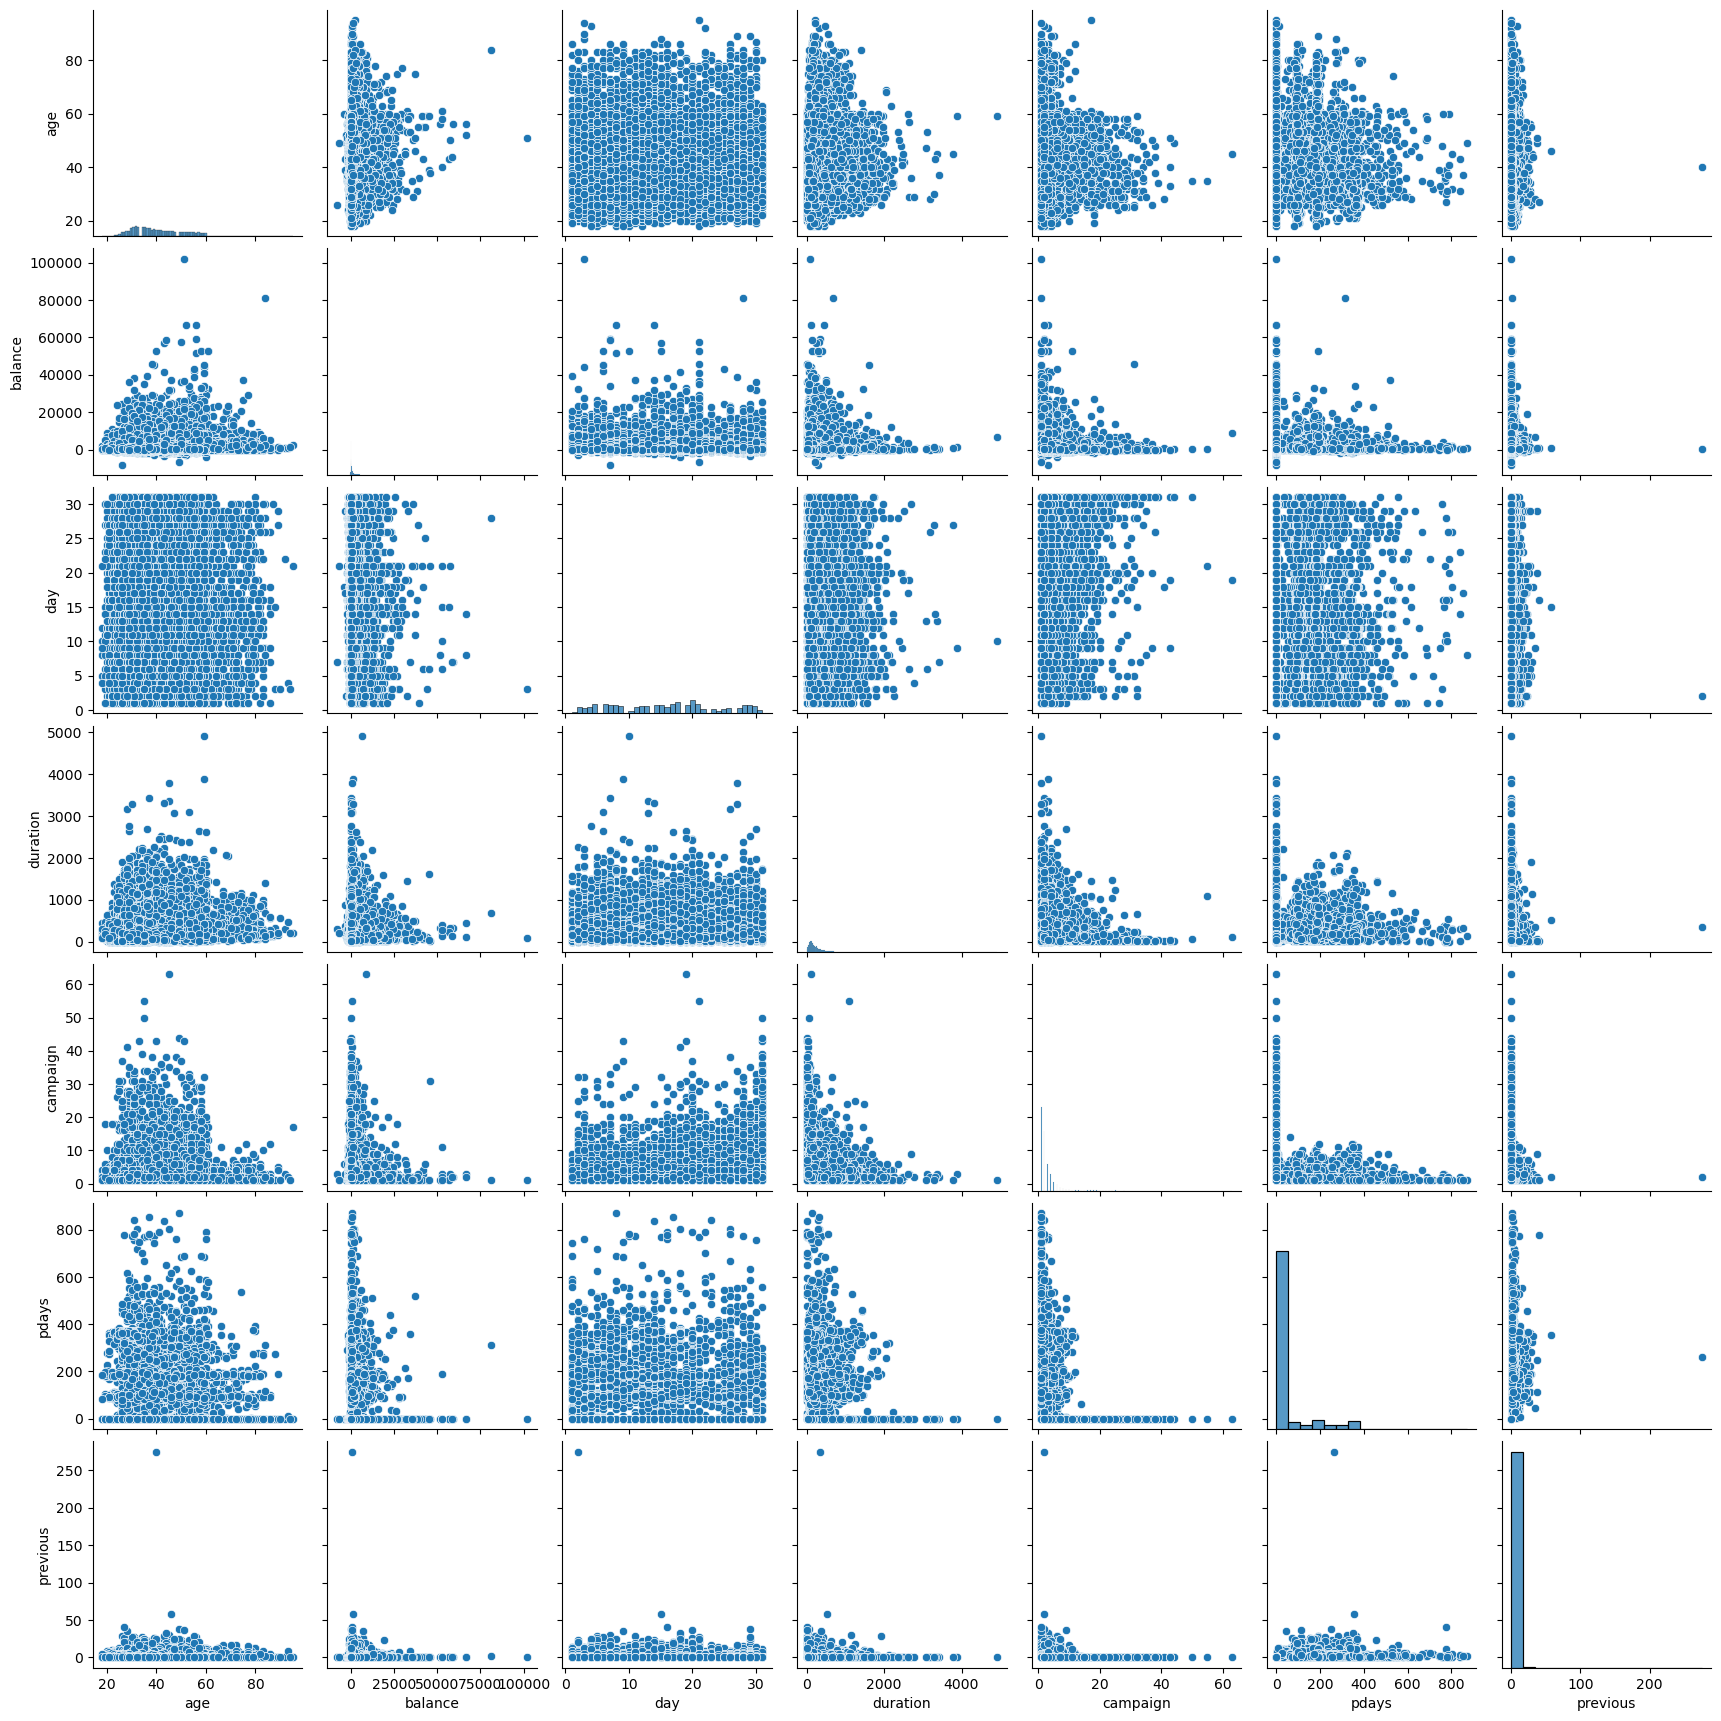

In [52]:
sns.pairplot(data=dfd,palette='Dark2')

for understanding in detail and do the modelling lets counvert the categoriacal data into numerical values of colunn like job,subscribed using label encoder

In [77]:
from sklearn.preprocessing import LabelEncoder
for i in dfd.columns:
        if dfd[i].dtype == np.number:
            continue
        dfd[i] = LabelEncoder().fit_transform(dfd[i])
dfd

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,38,0,1,3,0,2719,0,0,1,18,9,43,1,0,0,3,0
1,13,11,1,1,0,822,0,0,0,19,5,90,1,0,0,3,0
2,9,7,1,1,0,1709,1,0,0,17,5,239,0,0,0,3,0
3,39,4,0,2,0,3815,0,0,0,21,6,864,0,79,3,2,1
4,13,9,1,1,0,938,1,0,0,3,3,379,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,11,4,2,2,0,819,1,0,0,11,8,115,1,0,0,3,0
31643,35,4,0,2,0,1199,0,1,0,4,6,437,1,0,0,3,1
31644,14,4,2,2,0,1131,0,0,0,6,1,36,2,0,0,3,0
31645,39,9,1,1,0,1044,1,0,1,14,8,21,6,332,12,0,0


Checking for the ouliers in the dataset 

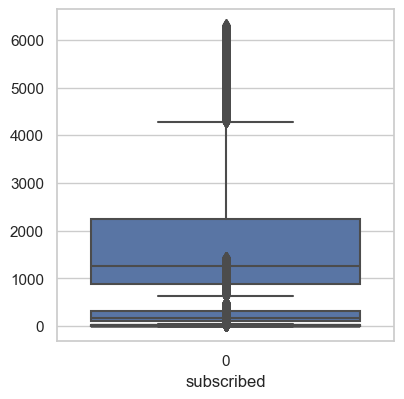

In [80]:
plt.figure(figsize=(20,25))
p=1
for i in dfd:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(dfd[i])
        plt.xlabel(i)

In [81]:
# remove the outliers by z-score method

In [98]:
from scipy import stats
outliers_df=dfd[['balance','duration']]

# Calculate the Z-Scores for each numerical attribute
z_scores=np.abs(stats.zscore(outliers_df))

# Set a threshold for considering data points as outliers 
threshold=3

# Identify outliers using the threshold
outliers=(z_scores > threshold).any(axis=1)

# Filter the dataset to remove rows with outliers
New_df = dfd[~outliers]

New_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,38,0,1,3,0,2719,0,0,1,18,9,43,1,0,0,3,0
1,13,11,1,1,0,822,0,0,0,19,5,90,1,0,0,3,0
2,9,7,1,1,0,1709,1,0,0,17,5,239,0,0,0,3,0
3,39,4,0,2,0,3815,0,0,0,21,6,864,0,79,3,2,1
4,13,9,1,1,0,938,1,0,0,3,3,379,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31641,19,9,2,2,0,2124,0,0,2,5,6,441,1,0,0,3,0
31642,11,4,2,2,0,819,1,0,0,11,8,115,1,0,0,3,0
31643,35,4,0,2,0,1199,0,1,0,4,6,437,1,0,0,3,1
31644,14,4,2,2,0,1131,0,0,0,6,1,36,2,0,0,3,0


In [85]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,38,0,1,3,0,2719,0,0,1,18,9,43,1,0,0,3,0
1,13,11,1,1,0,822,0,0,0,19,5,90,1,0,0,3,0
2,9,7,1,1,0,1709,1,0,0,17,5,239,0,0,0,3,0
3,39,4,0,2,0,3815,0,0,0,21,6,864,0,79,3,2,1
4,13,9,1,1,0,938,1,0,0,3,3,379,0,0,0,3,0


In [99]:
# shape of new and old dataframe
print("Old Dataframe-",dfd.shape[0])
print("New Dateframe-",New_df.shape[0])

Old Dataframe- 31647
New Dateframe- 30341


In [116]:
print(((dfd.shape[0]-New_df.shape[0])/dfd.shape[0])*100)

4.126773469839163


the loss percentage is not more and its in the limit

In [140]:
dfd=New_df
dfd

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,38,0,1,3,0,2719,0,0,1,18,9,43,1,0,0,3,0
1,13,11,1,1,0,822,0,0,0,19,5,90,1,0,0,3,0
2,9,7,1,1,0,1709,1,0,0,17,5,239,0,0,0,3,0
3,39,4,0,2,0,3815,0,0,0,21,6,864,0,79,3,2,1
4,13,9,1,1,0,938,1,0,0,3,3,379,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31641,19,9,2,2,0,2124,0,0,2,5,6,441,1,0,0,3,0
31642,11,4,2,2,0,819,1,0,0,11,8,115,1,0,0,3,0
31643,35,4,0,2,0,1199,0,1,0,4,6,437,1,0,0,3,1
31644,14,4,2,2,0,1131,0,0,0,6,1,36,2,0,0,3,0


In [166]:
test_df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
test_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [167]:
# here we are dropping the ID column 
test_df=test_df.drop('ID',axis=1)

In [168]:

for i in test_df.columns:
        if test_df[i].dtype == np.number:
            continue
        test_df[i] = LabelEncoder().fit_transform(test_df[i])
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,14,7,1,1,0,682,1,0,0,14,8,19,5,0,0,3
1,60,5,0,0,0,2809,0,0,1,0,5,371,0,0,0,3
2,13,6,2,2,0,708,1,0,2,15,8,673,0,0,0,3
3,39,7,2,0,0,3226,1,0,1,12,8,64,1,0,0,3
4,27,1,0,1,0,94,0,1,2,2,5,110,0,0,0,3


In [169]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report

In [171]:
X=dfd.drop('subscribed',axis=1)
y=dfd['subscribed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:

# Loading training dataset and testing dataset
# X_train, y_train: Features and labels for the training data


# Initialize and train a machine learning model 
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.8920744768495633
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      5415
           1       0.50      0.13      0.20       654

    accuracy                           0.89      6069
   macro avg       0.70      0.56      0.57      6069
weighted avg       0.86      0.89      0.86      6069



In [173]:
# Initialize and train a Decision Tree model
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Initialize and train a Random Forest model
rm= RandomForestClassifier()
rm.fit(X_train, y_train)

# Evaluate the Decision Tree model
y_pred= dt.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test,y_pred)
decision_tree_report = classification_report(y_test, y_pred)

# Evaluate the Random Forest model
y_pred= rm.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, y_pred)
random_forest_report = classification_report(y_test, y_pred)


print("\nDecision Tree Model:")
print(f"Accuracy: {decision_tree_accuracy:.2f}")
print("Classification Report:\n", decision_tree_report)

print("\nRandom Forest Model:")
print(f"Accuracy: {random_forest_accuracy:.2f}")
print("Classification Report:\n", random_forest_report)


Decision Tree Model:
Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      5415
           1       0.46      0.45      0.46       654

    accuracy                           0.88      6069
   macro avg       0.70      0.69      0.70      6069
weighted avg       0.88      0.88      0.88      6069


Random Forest Model:
Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      5415
           1       0.71      0.36      0.47       654

    accuracy                           0.91      6069
   macro avg       0.82      0.67      0.71      6069
weighted avg       0.90      0.91      0.90      6069



We observed that there is maximum accuracy in the random forest classifier of 91% then we will predict the test model with random forest classifier

In [177]:
#  X_train having the data of the triaining dataset 
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Using the trained model to make predictions on the test dataset
y_test_pred = model.predict(test_df)

# Now, y_pred contains the predicted values for the test dataset


In [178]:
y_test_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [179]:
test_df['y_test_pred']=y_test_pred
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_test_pred
0,14,7,1,1,0,682,1,0,0,14,8,19,5,0,0,3,0
1,60,5,0,0,0,2809,0,0,1,0,5,371,0,0,0,3,0
2,13,6,2,2,0,708,1,0,2,15,8,673,0,0,0,3,0
3,39,7,2,0,0,3226,1,0,1,12,8,64,1,0,0,3,0
4,27,1,0,1,0,94,0,1,2,2,5,110,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,21,4,1,2,0,609,0,0,0,27,1,147,3,0,0,3,0
13560,36,1,1,0,0,2535,1,0,2,19,6,157,0,0,0,3,0
13561,17,5,1,0,0,849,1,0,0,28,4,135,0,0,0,3,0
13562,11,0,2,1,0,1028,0,0,0,8,9,207,1,62,3,2,1


Text(0, 0.5, 'Count')

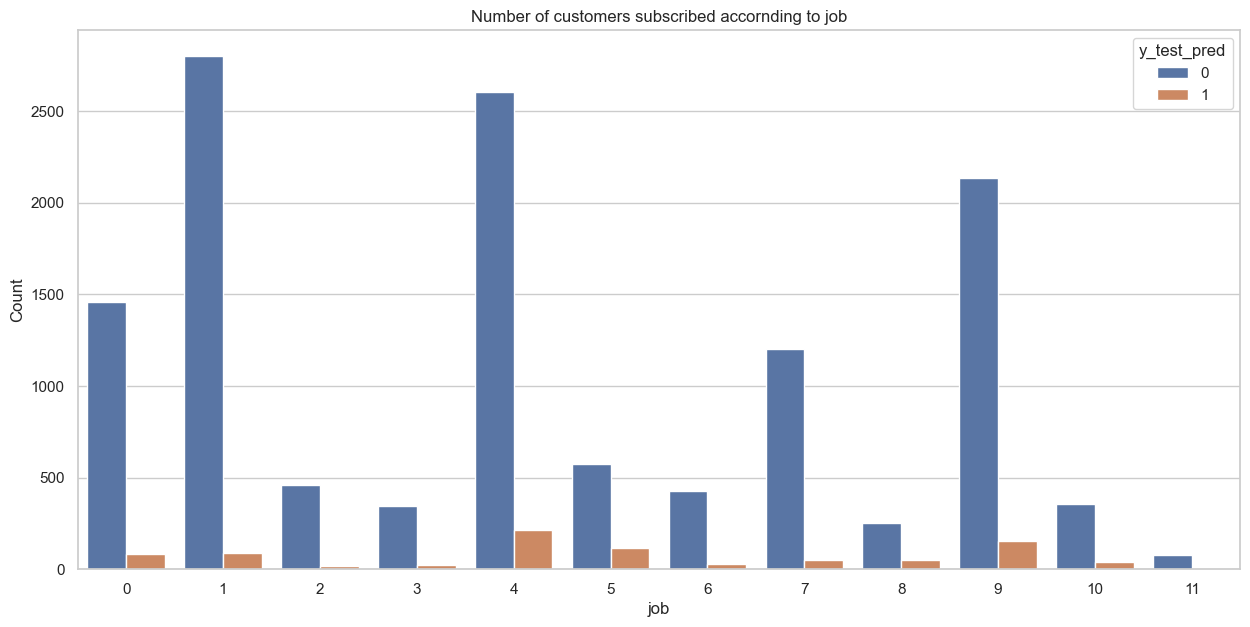

In [180]:

sns.countplot(x='job' , hue='y_test_pred' , data=test_df)

plt.title("Number of customers subscribed accornding to job")
plt.xlabel('job')
plt.ylabel('Count')